In [1]:
import pandas as pd

#Loading dataset using Pandas
df = pd.read_csv('dataset_working.csv')
#Getting basix information
df.info()
#Getting basic statistics
df.describe()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Segment ID  4965 non-null   int64  
 1   p1          4965 non-null   float64
 2   p2          4965 non-null   float64
 3   p3          4965 non-null   float64
 4   p4          4965 non-null   float64
 5   p5          4965 non-null   float64
 6   p6          4965 non-null   float64
 7   p7          4965 non-null   float64
 8   p8          4965 non-null   float64
 9   p9          4965 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 388.0 KB
      Segment ID         p1         p2         p3         p4         p5  \
0              1  13.882446  15.475555  19.017993  13.035903   7.795000   
1              2  13.545506  15.478632  19.410562  12.982541   7.587366   
2              3  14.145973  15.478665  19.476097  13.075993   7.701588   
3              4  14.011594  15.529142  18.722596

In [2]:
#skewness of features
skewness = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']].skew()
print("Skewness\n", skewness)

# kurtosis of features
kurtosis = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']].kurtosis()
print("Kurtosis\n", kurtosis)

# variance of features
variances = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']].var()
print("Variances\n", variances)

Skewness
 p1    0.211257
p2    0.383964
p3    0.197608
p4    0.819448
p5    0.904257
p6    0.535677
p7   -0.095076
p8    0.583247
p9    0.993488
dtype: float64
Kurtosis
 p1    2.096744
p2    0.921947
p3   -0.230654
p4    1.239140
p5    0.386213
p6    0.460131
p7   -0.486680
p8    0.421621
p9    0.779095
dtype: float64
Variances
 p1    1.456610
p2    1.371938
p3    2.528175
p4    2.008085
p5    4.821429
p6    1.572653
p7    4.265557
p8    1.404658
p9    3.143322
dtype: float64


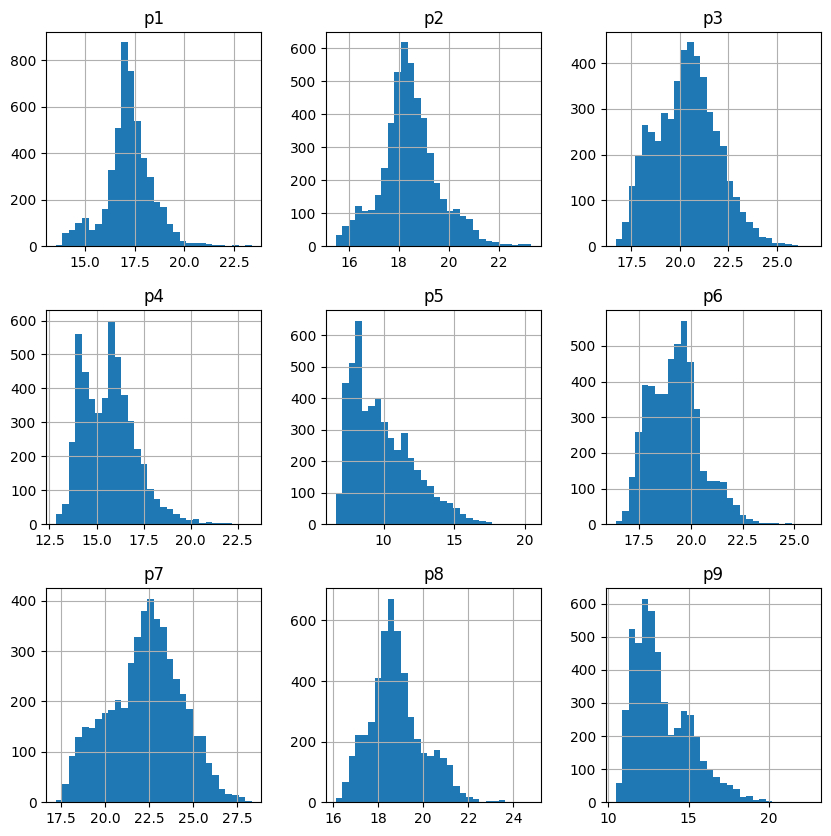

In [3]:
#Histograms
import matplotlib.pyplot as plt
df_without_id = df.drop('Segment ID', axis=1)
df_without_id.hist(bins=30, figsize=(10,10))
plt.show()


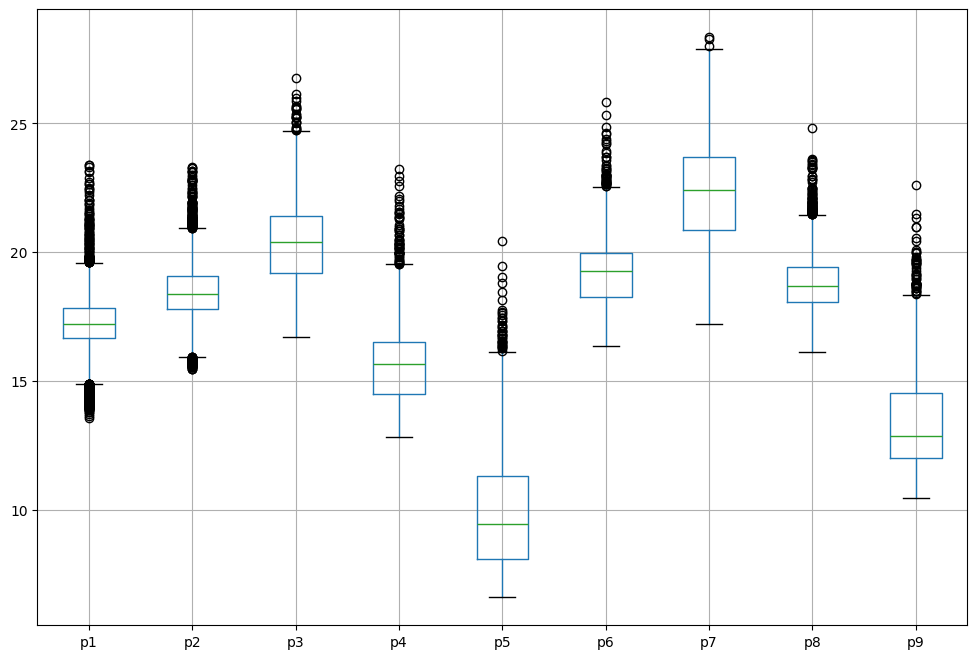

In [4]:
#Boxplots
df_without_id.boxplot(figsize=(12, 8))
plt.show()

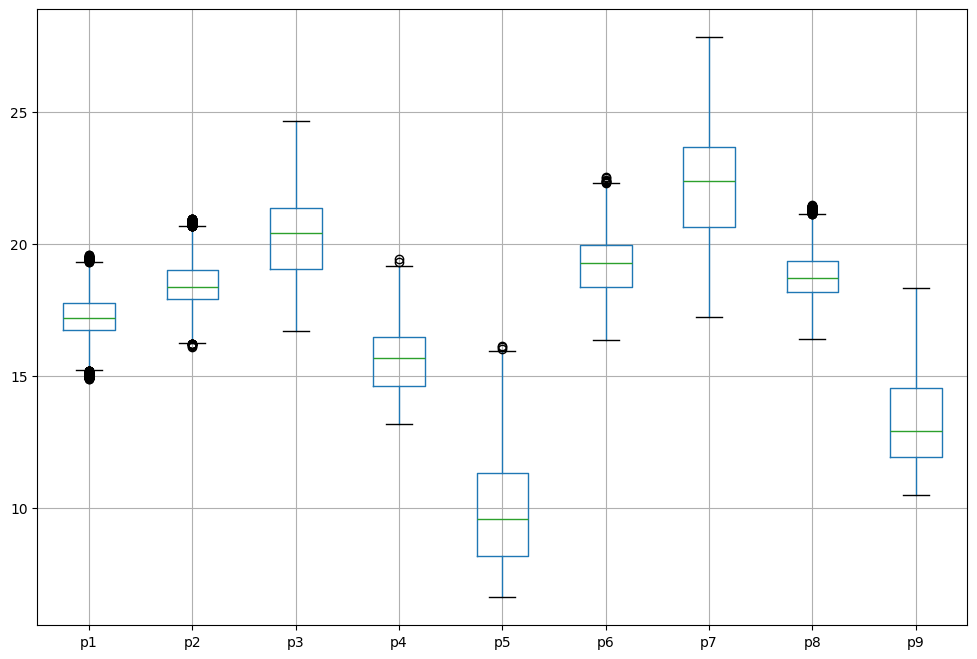

In [5]:
#Outlier removal using IQR
Q1 = df_without_id.quantile(0.25)
Q3 = df_without_id.quantile(0.75)
IQR = Q3 - Q1
df_without_id_outliers_removed = df_without_id[~((df_without_id < (Q1 - 1.5 * IQR)) | (df_without_id > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_id_outliers_removed.boxplot(figsize=(12, 8))
plt.show()

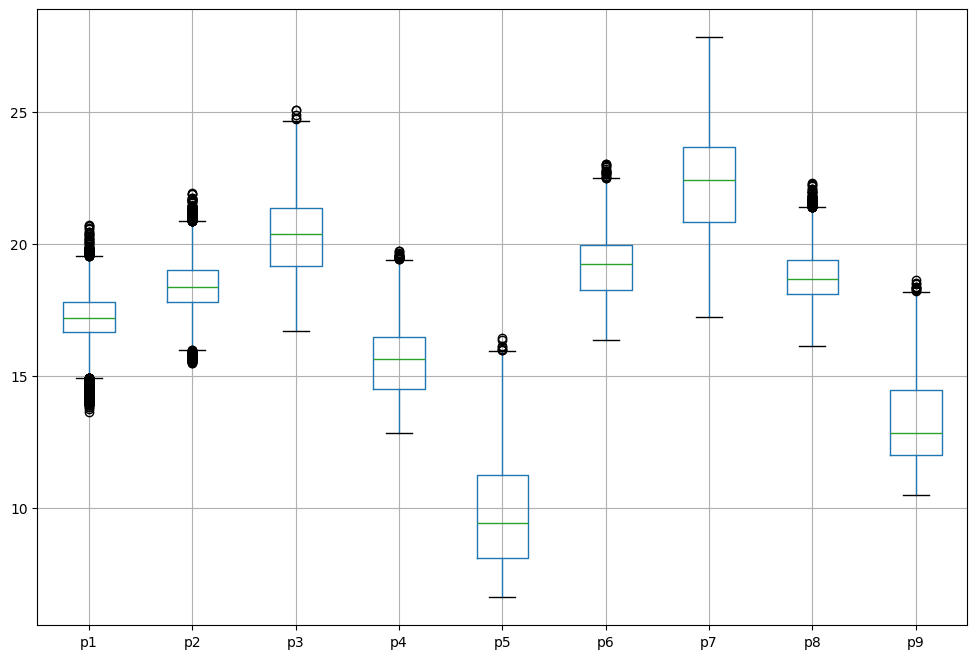

In [6]:
#Outlier removal using Z-score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_without_id))
df_without_id_outliers_removed_z = df_without_id[(z < 3).all(axis=1)]
df_without_id_outliers_removed_z.boxplot(figsize=(12, 8))
plt.show()

In [7]:
#calculating correlation matrix
correlation_matrix = df_without_id.corr()
print(correlation_matrix)

          p1        p2        p3        p4        p5        p6        p7  \
p1  1.000000  0.791866  0.291700  0.763252  0.590889  0.419700  0.207128   
p2  0.791866  1.000000  0.430271  0.385943  0.202833  0.672067  0.325141   
p3  0.291700  0.430271  1.000000 -0.084135 -0.086218  0.826062  0.918087   
p4  0.763252  0.385943 -0.084135  1.000000  0.894443  0.027141 -0.136669   
p5  0.590889  0.202833 -0.086218  0.894443  1.000000 -0.069220 -0.100134   
p6  0.419700  0.672067  0.826062  0.027141 -0.069220  1.000000  0.701325   
p7  0.207128  0.325141  0.918087 -0.136669 -0.100134  0.701325  1.000000   
p8  0.565806  0.899574  0.488176  0.233261  0.067533  0.810570  0.370112   
p9  0.560569  0.146425 -0.168375  0.914552  0.958771 -0.140766 -0.185643   

          p8        p9  
p1  0.565806  0.560569  
p2  0.899574  0.146425  
p3  0.488176 -0.168375  
p4  0.233261  0.914552  
p5  0.067533  0.958771  
p6  0.810570 -0.140766  
p7  0.370112 -0.185643  
p8  1.000000  0.007517  
p9  0.007517  

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

#Loading dataset using Pandas
df = pd.read_csv('dataset_working.csv')

#Igonring the Segment ID column
columns_check = [col for col in df.columns if (col != 'Segment ID')]

Q1 = df[columns_check].quantile(0.25)
Q3 = df[columns_check].quantile(0.75)
IQR = Q3 - Q1

#Removing outliers
df_without_outliers = df[~((df[columns_check] < Q1 - 1.5 * IQR) | (df[columns_check] > Q3 + 1.5 * IQR)).any(axis=1)]

#Square root transformation
df_without_outliers['p4'] = np.sqrt(df_without_outliers['p4'])
df_without_outliers['p5'] = np.sqrt(df_without_outliers['p5'])
df_without_outliers['p6'] = np.sqrt(df_without_outliers['p6'])
df_without_outliers['p8'] = np.sqrt(df_without_outliers['p8'])

#Log transformation for p9
df_without_outliers['p9'] = np.log1p(df_without_outliers['p9'])  

#Standardization for features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_outliers[['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']])

#Applying PCA with 95% of variance
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(df_scaled)

/var/folders/cb/_6k0kbyd0q303y_qn_1z14xh0000gn/T/ipykernel_60464/1504557030.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['p4'] = np.sqrt(df_without_outliers['p4'])
/var/folders/cb/_6k0kbyd0q303y_qn_1z14xh0000gn/T/ipykernel_60464/1504557030.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['p5'] = np.sqrt(df_without_outliers['p5'])
/var/folders/cb/_6k0kbyd0q303y_qn_1z14xh0000gn/T/ipykernel_60464/1504557030.py:25: SettingWithCopyWarning: 
A value is trying to